<a href="https://colab.research.google.com/github/desve/vk-text-to-image-demo/blob/main/05_gradio_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Установка и импорт

In [ ]:
!pip install -q deep-translator

In [1]:
!git clone https://github.com/desve/vk-text-to-image-demo.git
%cd vk-text-to-image-demo

Cloning into 'vk-text-to-image-demo'...
remote: Enumerating objects: 185, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 185 (delta 26), reused 0 (delta 0), pack-reused 136 (from 1)
Receiving objects: 100% (185/185), 56.61 MiB | 29.06 MiB/s, done.
Resolving deltas: 100% (103/103), done.
/content/vk-text-to-image-demo


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

text_encoder_2/model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae_1_0/diffusion_pytorch_model.safetens(…):   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!
Token indices sequence length is longer than the specified maximum sequence length for this model (135 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['high table, audience in soft focus, subtle blue and violet accent lighting, no desktop computers on stage, professional yet relaxed atmosphere, кот смотрит телевизор, flat illustration, clean lines, blue and violet colors']
Token indices sequence length is longer than the specified maximum sequence length for this model (135 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['high table, audience in soft focus, subtle blue and violet accent lighting, no desktop computers on stage, professional yet relaxed atmosphere, кот смотри

  0%|          | 0/25 [00:00<?, ?it/s]

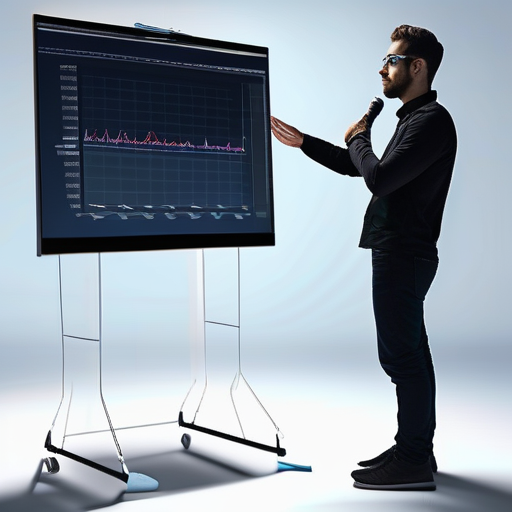

In [2]:
import service_layer

# быстрая проверка
img = service_layer.generate_image_for_app(
    scene_name="Самопрезентация",
    style_key="vk_flat",
    user_text="кот смотрит телевизор",
)
img

# Базовые импорты и переход в папку репо

In [3]:
%cd /content/vk-text-to-image-demo

import service_layer
import gradio as gr

/content/vk-text-to-image-demo


# Определяем функцию для Gradio

In [4]:
def generate_image_ui(scene, style, text, steps, guidance):
    """
    Функция-обработчик для Gradio:
    принимает параметры из UI, вызывает сервисный слой и возвращает PIL.Image.
    """
    img = service_layer.generate_image_for_app(
        scene_name=scene,
        style_key=style,
        user_text=text,
        steps=steps,
        guidance=guidance,
        height=512,
        width=512,
    )
    return img

# Описываем минимальный интерфейс Gradio

In [5]:
scenes = [
    "Самопрезентация",
    "Профессиональное достижение",
    "Команда VK",
    "Свободный текст",
]

styles = [
    "vk_flat",
    "neon",
]

with gr.Blocks(title="VK Career Text-to-Image") as demo:
    gr.Markdown("## VK Career Text‑to‑Image\nГенерация иллюстраций по карьерным текстам в стиле VK (SDXL).")

    with gr.Row():
        with gr.Column(scale=1):
            scene_dd = gr.Dropdown(
                label="Сцена",
                choices=scenes,
                value="Самопрезентация",
            )

            style_dd = gr.Dropdown(
                label="Стиль",
                choices=styles,
                value="vk_flat",
            )

            text_box = gr.Textbox(
                label="Текст запроса (RU / EN)",
                placeholder="Например: я выступаю на сцене с пет‑проектом",
                lines=3,
            )

            steps_slider = gr.Slider(
                label="num_inference_steps",
                minimum=10,
                maximum=60,
                value=25,
                step=1,
            )

            guidance_slider = gr.Slider(
                label="guidance_scale",
                minimum=3.0,
                maximum=15.0,
                value=7.5,
                step=0.5,
            )

            generate_btn = gr.Button("Сгенерировать", variant="primary")

        with gr.Column(scale=1):
            output_image = gr.Image(
                label="Результат",
                type="pil",
                interactive=False,
                height=512,
            )

    gr.Markdown("_Проект создан в рамках программы VK Education._")

    generate_btn.click(
        fn=generate_image_ui,
        inputs=[scene_dd, style_dd, text_box, steps_slider, guidance_slider],
        outputs=output_image,
    )

demo.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://25149be9ba699bd28f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Обновлённая идея UI c аккордеоном и подсказками

In [5]:
scenes = [
    "Самопрезентация",
    "Профессиональное достижение",
    "Команда VK",
    "Свободный текст",
]

styles = [
    "vk_flat",
    "neon",
]

from gradio import themes
import gradio as gr

scenes = [
    "Самопрезентация",
    "Профессиональное достижение",
    "Команда VK",
    "Свободный текст",
]

styles = [
    "vk_flat",
    "neon",
]

custom_theme = themes.Soft(
    primary_hue="indigo",
    secondary_hue="blue",
)

css = """
body {
    background: radial-gradient(circle at top, #050816 0, #02010a 45%, #000000 100%);
}
.gradio-container {
    max-width: 960px !important;
    margin: auto !important;
}
.neon-title {
    font-size: 2.1rem;
    font-weight: 700;
    text-align: center;
    color: #e0e7ff;
    text-shadow: 0 0 10px rgba(79, 70, 229, 0.9), 0 0 20px rgba(56, 189, 248, 0.7);
    margin-bottom: 0.25rem;
}
.subtitle {
    text-align: center;
    color: #4f46e5;          /* темный индиго вместо очень светлого */
    margin-bottom: 1.2rem;
    font-size: 0.98rem;
    text-shadow: 0 0 6px rgba(129, 140, 248, 0.5);  /* мягкое свечение */
}
.footer {
    text-align: center;
    font-size: 0.85rem;
    color: #9ca3af;
    margin-top: 0.8rem;
}
"""

def generate_image_ui(scene, style, text, steps, guidance):
    img = service_layer.generate_image_for_app(
        scene_name=scene,
        style_key=style,
        user_text=text,
        steps=steps,
        guidance=guidance,
        height=512,
        width=512,
    )
    return img

with gr.Blocks(
    title="VK Career Text-to-Image",
    theme=custom_theme,
    css=css,
) as demo:
    gr.HTML(
        """
        <div>
            <div class="neon-title">VK Career Text‑to‑Image</div>
            <div class="subtitle">
                Три сцены: самопрезентация, профессиональное достижение, команда VK.
                Два стиля: vk_flat (минималистичный flat) и neon (контрастный неон).
            </div>
        </div>
        """
    )

    with gr.Row():
        with gr.Column(scale=1):
            scene_dd = gr.Dropdown(
                label="Сцена",
                choices=scenes,
                value="Самопрезентация",
                info="Выберите одну из готовых сцен или Свободный текст.",
            )

            style_dd = gr.Dropdown(
                label="Стиль",
                choices=styles,
                value="vk_flat",
                info="vk_flat — спокойный flat; neon — яркий неоновый стиль.",
            )

            text_box = gr.Textbox(
                label="Текст запроса (RU / EN)",
                placeholder=(
                    "Текст можно оставить пустым для преднастроенных сцен.\n"
                    "Например: я выступаю на сцене с пет‑проектом про рекомендательную систему."
                ),
                lines=3,
            )

            with gr.Accordion("Расширенные настройки", open=False):
                steps_slider = gr.Slider(
                    label="num_inference_steps",
                    minimum=10,
                    maximum=60,
                    value=25,
                    step=1,
                    info="Больше шагов — выше качество, но дольше генерация.",
                )

                guidance_slider = gr.Slider(
                    label="guidance_scale",
                    minimum=3.0,
                    maximum=15.0,
                    value=7.5,
                    step=0.5,
                    info="Чем выше, тем сильнее модель следует тексту.",
                )

            generate_btn = gr.Button("Сгенерировать", variant="primary")

        with gr.Column(scale=1):
            output_image = gr.Image(
                label="Результат",
                type="pil",
                interactive=False,
                height=512,
            )

    gr.HTML('<div class="footer">Проект создан в рамках программы VK Education.</div>')

    generate_btn.click(
        fn=generate_image_ui,
        inputs=[scene_dd, style_dd, text_box, steps_slider, guidance_slider],
        outputs=output_image,
        show_progress="full",
    )

demo.launch()

/tmp/ipython-input-450466717.py:76: DeprecationWarning: The 'theme' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'theme' to Blocks.launch() instead.
  with gr.Blocks(
/tmp/ipython-input-450466717.py:76: DeprecationWarning: The 'css' parameter in the Blocks constructor will be removed in Gradio 6.0. You will need to pass 'css' to Blocks.launch() instead.
  with gr.Blocks(


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://159c1aaa3a0ba74461.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Мини‑тест после правок

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['аю о своем пет ‑ проекте для vk, flat illustration, clean lines, blue and violet colors']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['аю о своем пет ‑ проекте для vk, flat illustration, clean lines, blue and violet colors']


  0%|          | 0/25 [00:00<?, ?it/s]

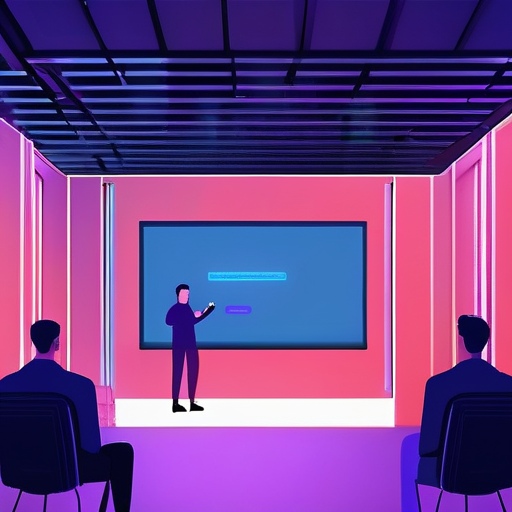

In [21]:
img = service_layer.generate_image_for_app(
    scene_name="Самопрезентация",
    style_key="vk_flat",
    user_text="я рассказываю о своем пет‑проекте для VK",
    steps=25,
    guidance=7.5,
)
img

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['minimal design with many small office details, мы обсуждаем идею нового сервиса, neon cyberpunk style, glowing edges, high contrast']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['minimal design with many small office details, мы обсуждаем идею нового сервиса, neon cyberpunk style, glowing edges, high contrast']


  0%|          | 0/30 [00:00<?, ?it/s]

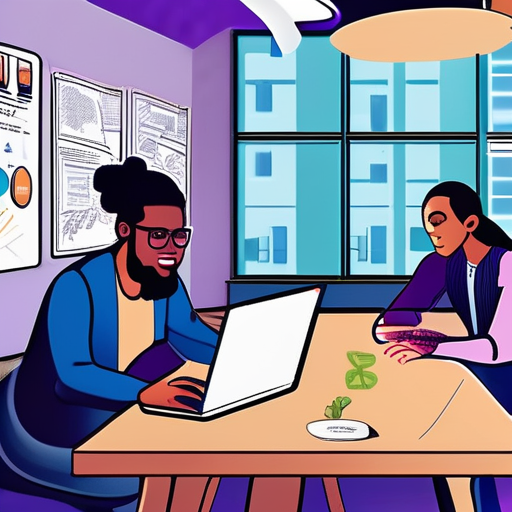

In [18]:
img2 = service_layer.generate_image_for_app(
    scene_name="Команда VK",
    style_key="neon",
    user_text="мы обсуждаем идею нового сервиса",
    steps=30,
    guidance=8.5,
)
img2

# ФИНАЛЬНАЯ ВЕРСИЯ ДЛЯ ИСПОЛНЕНИЯ

In [ ]:
%cd /content/vk-text-to-image-demo

import importlib
import gradio as gr
from gradio import themes
import service_layer

# Перезагрузка модуля на случай правок
importlib.reload(service_layer)

# ---- Обёртка для Gradio ----

def generate_image_ui(scene, style, text, steps, guidance):
    img = service_layer.generate_image_for_app(
        scene_name=scene,
        style_key=style,
        user_text=text,
        steps=steps,
        guidance=guidance,
        height=512,
        width=512,
    )
    return img

# ---- Данные для UI ----

scenes = [
    "Самопрезентация",
    "Профессиональное достижение",
    "Команда VK",
    "Свободный текст",
]

styles = [
    "vk_flat",
    "neon",
]

examples = [
    # Самопрезентация
    ["Самопрезентация", "vk_flat", "я выступаю на сцене хакатона со своим пет‑проектом"],
    ["Самопрезентация", "neon", "делаю питч про сервис рекомендаций музыки для VK"],
    ["Самопрезентация", "vk_flat", "рассказываю студентам, как прошла моя стажировка во VK"],
    # Профессиональное достижение
    ["Профессиональное достижение", "vk_flat", "я допилил важную фичу и выкатываю релиз ночью в офисе"],
    ["Профессиональное достижение", "neon", "разбираю графики A/B‑теста, который улучшил конверсию"],
    ["Профессиональное достижение", "vk_flat", "праздную закрытие сложной задачи по оптимизации сервисов"],
    # Команда VK
    ["Команда VK", "vk_flat", "мы с командой обсуждаем идею нового сервиса в переговорке"],
    ["Команда VK", "neon", "готовим демо к внутреннему митапу и репетируем презентацию"],
    ["Команда VK", "vk_flat", "проводим ретро после хакатона и записываем инсайты на доске"],
]

custom_theme = themes.Soft(
    primary_hue="indigo",
    secondary_hue="blue",
)

css = """
body {
    background: radial-gradient(circle at top, #050816 0, #02010a 45%, #000000 100%);
}
.gradio-container {
    max-width: 960px !important;
    margin: auto !important;
}
.neon-title {
    font-size: 2.1rem;
    font-weight: 700;
    text-align: center;
    color: #e0e7ff;
    text-shadow: 0 0 10px rgba(79, 70, 229, 0.9), 0 0 20px rgba(56, 189, 248, 0.7);
    margin-bottom: 0.25rem;
}
.subtitle {
    text-align: center;
    color: #4f46e5;
    margin-bottom: 1.2rem;
    font-size: 0.98rem;
    text-shadow: 0 0 6px rgba(129, 140, 248, 0.5);
}
.footer {
    text-align: center;
    font-size: 0.85rem;
    color: #9ca3af;
    margin-top: 0.8rem;
}
"""

with gr.Blocks(
    title="VK Career Text-to-Image",
    theme=custom_theme,
    css=css,
) as demo:
    gr.HTML(
        """
        <div>
            <div class="neon-title">VK Career Text‑to‑Image</div>
            <div class="subtitle">
                Три сцены: самопрезентация, профессиональное достижение, команда VK.
                Два стиля: vk_flat (минималистичный flat) и neon (контрастный неон).
            </div>
        </div>
        """
    )

    with gr.Row():
        with gr.Column(scale=1):
            scene_dd = gr.Dropdown(
                label="Сцена",
                choices=scenes,
                value="Самопрезентация",
                info="Выберите одну из готовых сцен или Свободный текст.",
            )

            style_dd = gr.Dropdown(
                label="Стиль",
                choices=styles,
                value="vk_flat",
                info="vk_flat — спокойный flat; neon — яркий неоновый стиль.",
            )

            text_box = gr.Textbox(
                label="Текст запроса (RU / EN)",
                placeholder=(
                    "Текст можно оставить пустым для преднастроенных сцен.\n"
                    "Например: я выступаю на сцене с пет‑проектом про рекомендательную систему."
                ),
                lines=3,
            )

            with gr.Accordion("Расширенные настройки", open=False):
                steps_slider = gr.Slider(
                    label="num_inference_steps",
                    minimum=10,
                    maximum=60,
                    value=25,
                    step=1,
                    info="Больше шагов — выше качество, но дольше генерация.",
                )

                guidance_slider = gr.Slider(
                    label="guidance_scale",
                    minimum=3.0,
                    maximum=15.0,
                    value=7.5,
                    step=0.5,
                    info="Чем выше, тем сильнее модель следует тексту.",
                )

            generate_btn = gr.Button("Сгенерировать", variant="primary")

        with gr.Column(scale=1):
            output_image = gr.Image(
                label="Результат",
                type="pil",
                interactive=False,
                height=512,
            )

    gr.Examples(
        examples=examples,
        inputs=[scene_dd, style_dd, text_box],
        label="Примеры карьерных запросов",
    )

    gr.HTML('<div class="footer">Проект создан в рамках программы VK Education.</div>')

    generate_btn.click(
        fn=generate_image_ui,
        inputs=[scene_dd, style_dd, text_box, steps_slider, guidance_slider],
        outputs=output_image,
        show_progress="full",
    )

demo.launch()